# Waterkwaliteitsportaal oppervlaktewater kwaliteit analyse met chatgpt
## Inhoudsopgave
1. Data downloaden van https://www.waterkwaliteitsportaal.nl/ , inlezen en dataframe maken
2. Data opschonen
3. Exporteren naar Chatgpt als csv
4. Antwoord Chatgpt kopieren en analyseren in notebook

In [1]:
import pandas as pd
import glob
import os

## 1. Data inlezen en dataframe maken

In [3]:
path = 'C:/Users/oostemb/Downloads/IM_Metingen_2022'
all_files = glob.glob(os.path.join(path , "*.csv"))
li = []

for filename in all_files:
    df = pd.read_csv(filename, sep=';',index_col=None, header=0, low_memory=False)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [4]:
frame

,Waterbeheerder.omschrijving,Meetobject.namespace,Meetobject.code,Meetobject.lokaalID,Namespace,Monster.Identificatie,Monster.lokaalID,MonsterCompartiment.code,MonsterCompartiment.omschrijving,Orgaan.code,...,Compartiment.code,Compartiment.omschrijving,Waardebewerkingsmethode.code,Waardebewerkingsmethode.omschrijving,Limietsymbool,Numeriekewaarde,Alfanumeriekewaarde,Kwaliteitsoordeel.code,Rapportagejaar,Meetjaar
0,Wetterskip Fryslan,NL02,NL02_0002,"""0002""",NL02,NaN,"""0002""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,130.00,NaN,"""00""",2023,2022
1,Wetterskip Fryslan,NL02,NL02_0002,"""0002""",NL02,NaN,"""0002""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,400.00,NaN,"""00""",2023,2022
2,Wetterskip Fryslan,NL02,NL02_0002,"""0002""",NL02,NaN,"""0002""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,7.30,NaN,"""00""",2023,2022
3,Wetterskip Fryslan,NL02,NL02_0002,"""0002""",NL02,NaN,"""0002""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,0.48,NaN,"""00""",2023,2022
4,Wetterskip Fryslan,NL02,NL02_0002,"""0002""",NL02,NaN,"""0002""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,0.08,NaN,"""00""",2023,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098691,Rijkswaterstaat,NL92,NL92_VELWMMDN_Fytozoet,"""VELWMMDN_Fytozoet""",NL92,NL92_VELWMMDN_p158,"""VELWMMDN_Fytozoet""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,7.20,NaN,"""00""",2023,2022
3098692,Rijkswaterstaat,NL92,NL92_VROUWZD_Fytozoet,"""VROUWZD_Fytozoet""",NL92,NL92_VROUWZD_p131,"""VROUWZD_Fytozoet""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,66.00,NaN,"""00""",2023,2022
3098693,Rijkswaterstaat,NL92,NL92_VROUWZD_Fytozoet,"""VROUWZD_Fytozoet""",NL92,NL92_VROUWZD_p132,"""VROUWZD_Fytozoet""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,21.00,NaN,"""00""",2023,2022
3098694,Rijkswaterstaat,NL93,NL93_WIENE_Fytozoet,"""WIENE_Fytozoet""",NL93,NL93_WIENE_p209,"""WIENE_Fytozoet""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,4.00,NaN,"""00""",2023,2022


## 2.1 Data opschonen
## Allemaal waterschappen die niet in de provincie Zuid-Holland zitten. Eerst opschonen.

In [5]:
waterschappen_pzh = ['Hoogheemraadschap De Stichtse Rijnlanden', 'Waterschap Amstel Gooi en Vecht','Hoogheemraadschap van Rijnland','Hoogheemraadschap van Delfland','Hoogheemraadschap van Schieland en Krimpenerwaard', 'Waterschap Hollandse Delta']
mask = frame['Waterbeheerder.omschrijving'].isin(waterschappen_pzh)
pzh_metingen = frame[mask]

In [6]:
pzh_metingen

,Waterbeheerder.omschrijving,Meetobject.namespace,Meetobject.code,Meetobject.lokaalID,Namespace,Monster.Identificatie,Monster.lokaalID,MonsterCompartiment.code,MonsterCompartiment.omschrijving,Orgaan.code,...,Compartiment.code,Compartiment.omschrijving,Waardebewerkingsmethode.code,Waardebewerkingsmethode.omschrijving,Limietsymbool,Numeriekewaarde,Alfanumeriekewaarde,Kwaliteitsoordeel.code,Rapportagejaar,Meetjaar
43284,Waterschap Amstel Gooi en Vecht,NL11,NL11_ABC012,"""ABC012""",NL11,NL11_WP647191,"""ABC012""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,<,5.00,NaN,"""00""",2023,2022
43285,Waterschap Amstel Gooi en Vecht,NL11,NL11_ABC012,"""ABC012""",NL11,NL11_WP647191,"""ABC012""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,81.00,NaN,"""00""",2023,2022
43286,Waterschap Amstel Gooi en Vecht,NL11,NL11_ABC012,"""ABC012""",NL11,NL11_WP647191,"""ABC012""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,9.50,NaN,"""00""",2023,2022
43287,Waterschap Amstel Gooi en Vecht,NL11,NL11_ABC012,"""ABC012""",NL11,NL11_WP647191,"""ABC012""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,<,0.50,NaN,"""00""",2023,2022
43288,Waterschap Amstel Gooi en Vecht,NL11,NL11_ABC012,"""ABC012""",NL11,NL11_WP647191,"""ABC012""",NaN,NaN,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,<,0.50,NaN,"""00""",2023,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018761,Waterschap Hollandse Delta,NL40,NL40_YOP_1406,"""YOP_1406""",NL40,NL40_C-375966,"""YOP_1406""",OW,Oppervlaktewater,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,1.30,NaN,"""00""",2023,2022
3018762,Waterschap Hollandse Delta,NL40,NL40_YOP_1406,"""YOP_1406""",NL40,NL40_C-375966,"""YOP_1406""",OW,Oppervlaktewater,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,<,0.05,NaN,"""00""",2023,2022
3018763,Waterschap Hollandse Delta,NL40,NL40_YOP_1406,"""YOP_1406""",NL40,NL40_C-375966,"""YOP_1406""",OW,Oppervlaktewater,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,7.80,NaN,"""00""",2023,2022
3018764,Waterschap Hollandse Delta,NL40,NL40_YOP_1406,"""YOP_1406""",NL40,NL40_C-375966,"""YOP_1406""",OW,Oppervlaktewater,NaN,...,OW,Oppervlaktewater,NVT,Niet van toepassing,NaN,11.50,NaN,"""00""",2023,2022


In [7]:
pzh_metingen.columns

Index(['Waterbeheerder.omschrijving', 'Meetobject.namespace',
       'Meetobject.code', 'Meetobject.lokaalID', 'Namespace',
       'Monster.Identificatie', 'Monster.lokaalID', 'MonsterCompartiment.code',
       'MonsterCompartiment.omschrijving', 'Orgaan.code',
       'Orgaan.omschrijving', 'Organisme.naam', 'Bemonsteringsapparaat.code',
       'Bemonsteringsapparaat.omschrijving', 'Monsterophaaldatum',
       'Monsterophaaltijd', 'GeometriePunt.X', 'GeometriePunt.Y',
       'meetwaardeid', 'Meetwaarde.lokaalID', 'Resultaatdatum', 'Begindatum',
       'Begintijd', 'Einddatum', 'Eindtijd', 'Typering.code',
       'Typering.omschrijving', 'Grootheid.code', 'Grootheid.omschrijving',
       'Parameter.groep', 'Parameter.code', 'Parameter.omschrijving',
       'Parameter.CASnummer', 'Biotaxon.naam', 'Eenheid.code',
       'Eenheid.omschrijving', 'Hoedanigheid.code',
       'Hoedanigheid.omschrijving', 'Levensstadium.code',
       'Levensstadium.omschrijving', 'Lengteklasse.code',
       'Le

## Teveel kolommen. Bewaar alleen degene die ik nodig heb.

In [8]:
pzh_useful = pzh_metingen[['Waterbeheerder.omschrijving', 'Numeriekewaarde', 'Parameter.omschrijving', 'Monsterophaaldatum']]

In [9]:
pzh_useful

,Waterbeheerder.omschrijving,Numeriekewaarde,Parameter.omschrijving,Monsterophaaldatum
43284,Waterschap Amstel Gooi en Vecht,5.00,chlorofyl-a,NaN
43285,Waterschap Amstel Gooi en Vecht,81.00,calcium,NaN
43286,Waterschap Amstel Gooi en Vecht,9.50,chlorofyl-a,NaN
43287,Waterschap Amstel Gooi en Vecht,0.50,chlorofyl-a,NaN
43288,Waterschap Amstel Gooi en Vecht,0.50,chlorofyl-a,NaN
...,...,...,...,...
3018761,Waterschap Hollandse Delta,1.30,zink,2022-12-20
3018762,Waterschap Hollandse Delta,0.05,zirkonium,2022-12-20
3018763,Waterschap Hollandse Delta,7.80,NaN,2022-12-20
3018764,Waterschap Hollandse Delta,11.50,zuurstof,2022-12-20


## NaN Waardes. Lege rijen, heb ik niks aan, ook opschonen.

In [10]:
pzh_useful.isnull().sum(axis = 0)

Waterbeheerder.omschrijving         0
Numeriekewaarde                  5926
Parameter.omschrijving         332930
Monsterophaaldatum             438267
dtype: int64

In [11]:
pzh_useful_no_na = pzh_useful.dropna()

In [12]:
pzh_useful_no_na

,Waterbeheerder.omschrijving,Numeriekewaarde,Parameter.omschrijving,Monsterophaaldatum
71984,Hoogheemraadschap van Rijnland,8.600,zuurstof,2022-01-25
71985,Hoogheemraadschap van Rijnland,1.860,som nitraat en nitriet,2022-01-25
71986,Hoogheemraadschap van Rijnland,1.900,stikstof Kjeldahl,2022-01-25
71987,Hoogheemraadschap van Rijnland,3.800,stikstof totaal,2022-01-25
71988,Hoogheemraadschap van Rijnland,0.234,ammonium,2022-01-25
...,...,...,...,...
3018760,Waterschap Hollandse Delta,0.003,zilver,2022-12-20
3018761,Waterschap Hollandse Delta,1.300,zink,2022-12-20
3018762,Waterschap Hollandse Delta,0.050,zirkonium,2022-12-20
3018764,Waterschap Hollandse Delta,11.500,zuurstof,2022-12-20


In [13]:
filepath= 'C:/Users/oostemb/Downloads/pzh_krw_useful.csv'
pzh_useful_no_na.to_csv(filepath)  

# 3. Exporteren en uploaden naar chatgpt.

In [14]:
data = pzh_useful_no_na

## Vraag: Voer en visualiseer een gedetailleerde grafische analyse uit hoe Waterbeheerder.omschrijving, Monsterophaaldatum de Parameter.omschrijving en Numeriekewaarde beïnvloeden?

## Antwoord:

C:\Users\oostemb\AppData\Local\Temp\ipykernel_5248\2787303591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Monsterophaaldatum'] = pd.to_datetime(data['Monsterophaaldatum'])
C:\Users\oostemb\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\oostemb\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


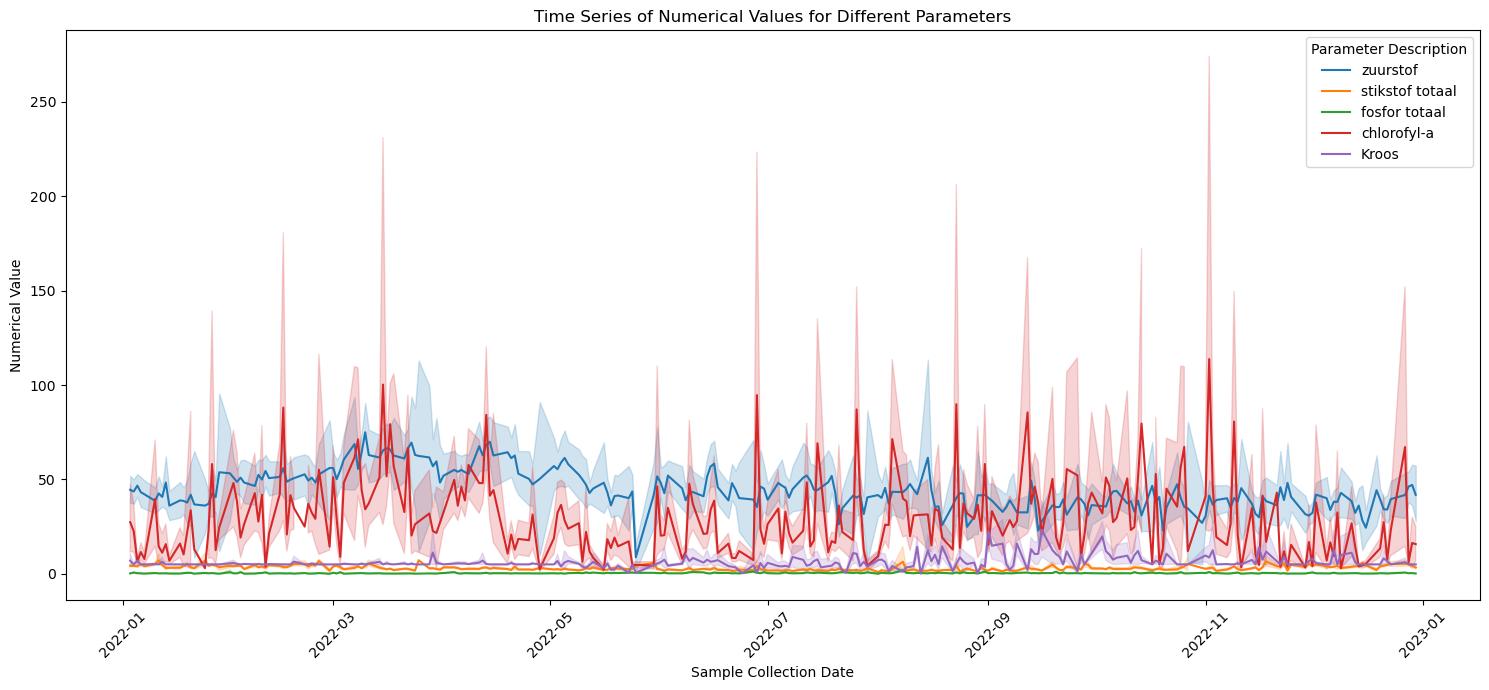

<module 'matplotlib.pyplot' from 'C:\\Users\\oostemb\\AppData\\Local\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

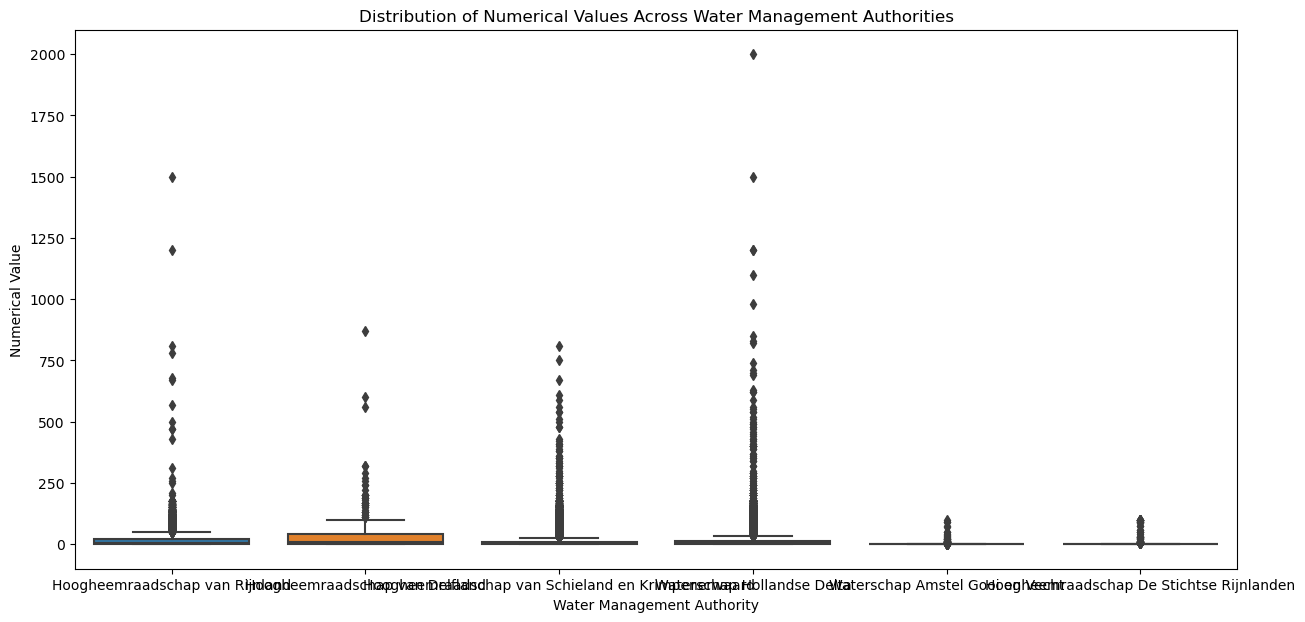

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Convert 'Monsterophaaldatum' to datetime
data['Monsterophaaldatum'] = pd.to_datetime(data['Monsterophaaldatum'])

# Selecting a subset of parameters for visualization to avoid clutter
selected_parameters = data['Parameter.omschrijving'].value_counts().index[:5]

# Filter data for selected parameters
filtered_data = data[data['Parameter.omschrijving'].isin(selected_parameters)]

# Time series plot for different parameters
plt.figure(figsize=(15, 7))
sns.lineplot(x='Monsterophaaldatum', y='Numeriekewaarde', hue='Parameter.omschrijving', data=filtered_data)
plt.title('Time Series of Numerical Values for Different Parameters')
plt.xlabel('Sample Collection Date')
plt.ylabel('Numerical Value')
plt.xticks(rotation=45)
plt.legend(title='Parameter Description')
plt.tight_layout()
plt.show()

# Box plot for different water management authorities
plt.figure(figsize=(15, 7))
sns.boxplot(x='Waterbeheerder.omschrijving', y='Numeriekewaarde', data=filtered_data)
plt.title('Distribution of Numerical Values Across Water Management Authorities')
plt.xlabel('Water Management Authority')
plt.ylabel('Numerical Value')
plt


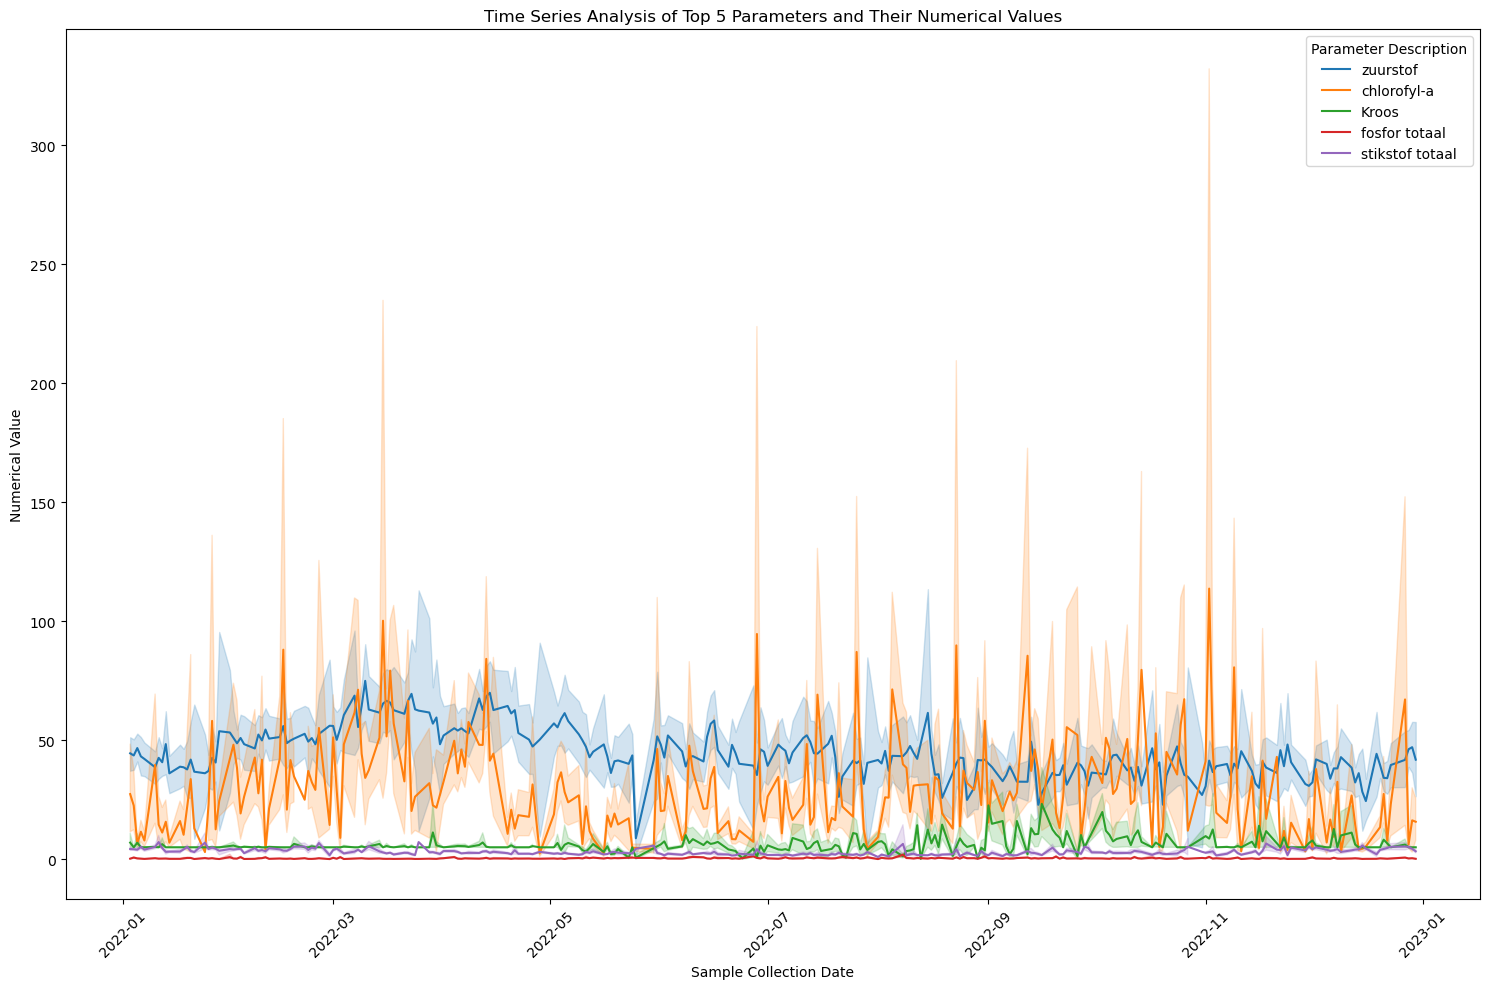

In [36]:
# Identify the top 5 most common parameter descriptions
top_5_parameters = data['Parameter.omschrijving'].value_counts().head(5).index

# Filter data for the top 5 parameters
top_5_data = data[data['Parameter.omschrijving'].isin(top_5_parameters)]

# Plot time series for the top 5 parameters and their corresponding numerical values
plt.figure(figsize=(15, 10))

for parameter in top_5_parameters:
    parameter_subset = top_5_data[top_5_data['Parameter.omschrijving'] == parameter]
    sns.lineplot(x='Monsterophaaldatum', y='Numeriekewaarde', data=parameter_subset, label=parameter)

plt.title('Time Series Analysis of Top 5 Parameters and Their Numerical Values')
plt.xlabel('Sample Collection Date')
plt.ylabel('Numerical Value')
plt.xticks(rotation=45)
plt.legend(title='Parameter Description')
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
data

,Waterbeheerder.omschrijving,Numeriekewaarde,Parameter.omschrijving,Monsterophaaldatum,Monsterophaaltijd,Meetobject.code
71984,Hoogheemraadschap van Rijnland,8.600,zuurstof,2022-01-25,14:25:43,NL13_OW0433
71985,Hoogheemraadschap van Rijnland,1.860,som nitraat en nitriet,2022-01-25,14:25:43,NL13_OW0433
71986,Hoogheemraadschap van Rijnland,1.900,stikstof Kjeldahl,2022-01-25,14:25:43,NL13_OW0433
71987,Hoogheemraadschap van Rijnland,3.800,stikstof totaal,2022-01-25,14:25:43,NL13_OW0433
71988,Hoogheemraadschap van Rijnland,0.234,ammonium,2022-01-25,14:25:43,NL13_OW0433
...,...,...,...,...,...,...
3018760,Waterschap Hollandse Delta,0.003,zilver,2022-12-20,15:46:00,NL40_YOP_1406
3018761,Waterschap Hollandse Delta,1.300,zink,2022-12-20,15:46:00,NL40_YOP_1406
3018762,Waterschap Hollandse Delta,0.050,zirkonium,2022-12-20,15:46:00,NL40_YOP_1406
3018764,Waterschap Hollandse Delta,11.500,zuurstof,2022-12-20,15:46:00,NL40_YOP_1406


In [20]:
import matplotlib.pyplot as plt

import seaborn as sns


C:\Users\oostemb\AppData\Local\Temp\ipykernel_13084\671574532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Monsterophaaldatum'] = pd.to_datetime(data['Monsterophaaldatum'])
C:\Users\oostemb\AppData\Local\Temp\ipykernel_13084\671574532.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Monsterophaaltijd'] = pd.to_datetime(data['Monsterophaaltijd'], format='%H:%M:%S').dt.time
C:\Users\oostemb\AppData\Local\Temp\ipykernel_13084\671574532.py:9: SettingWithCopyWarning: 
A value is trying to b

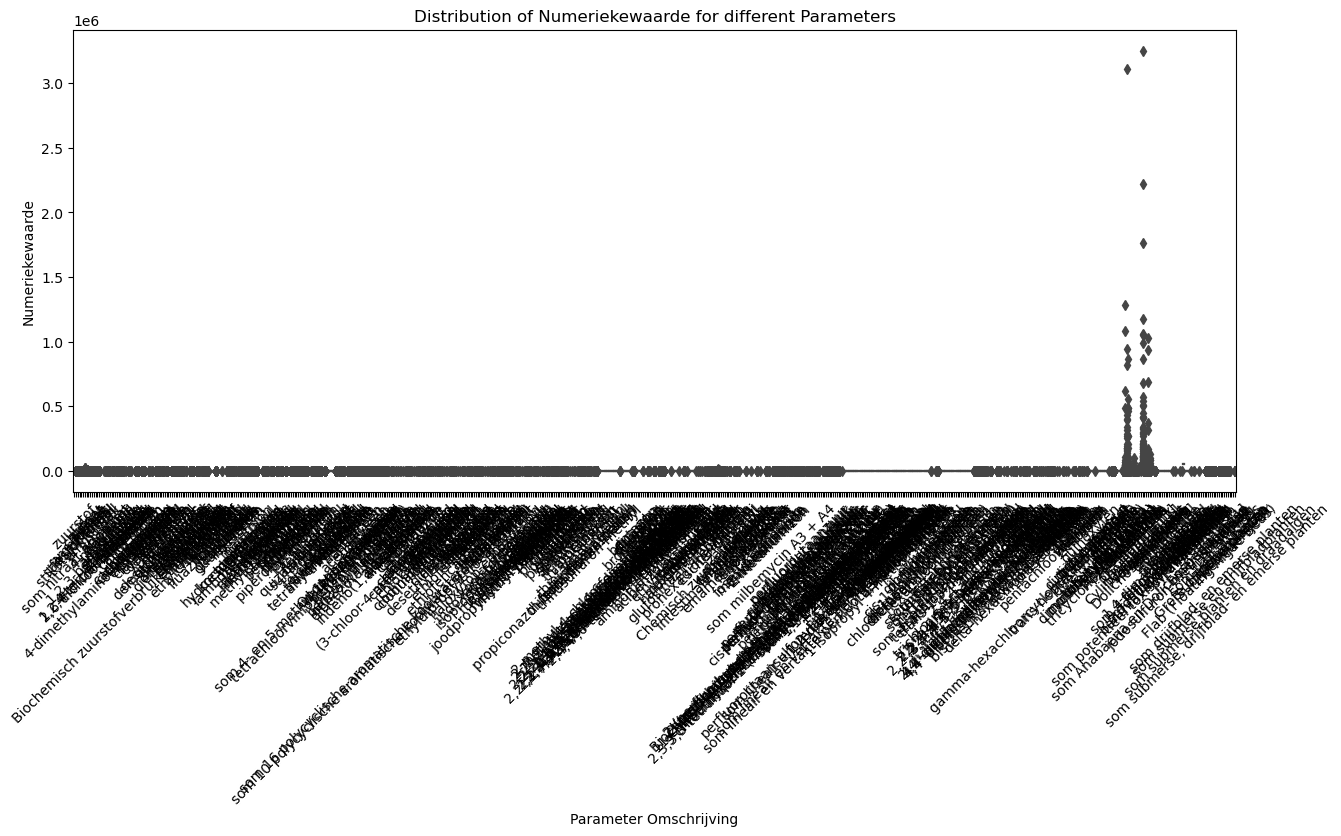

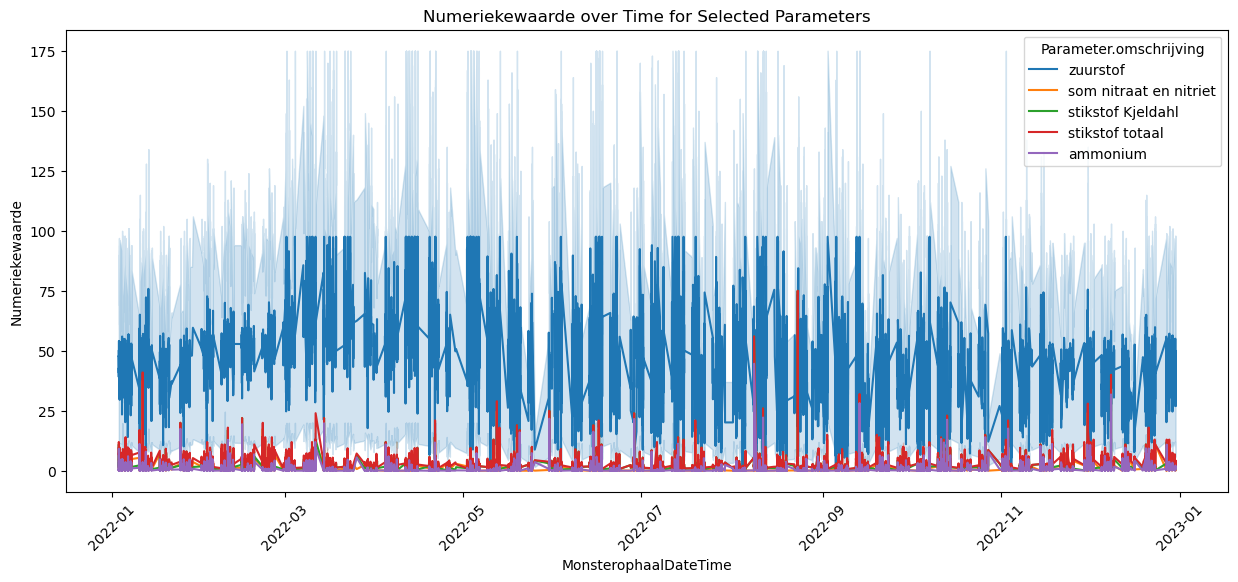

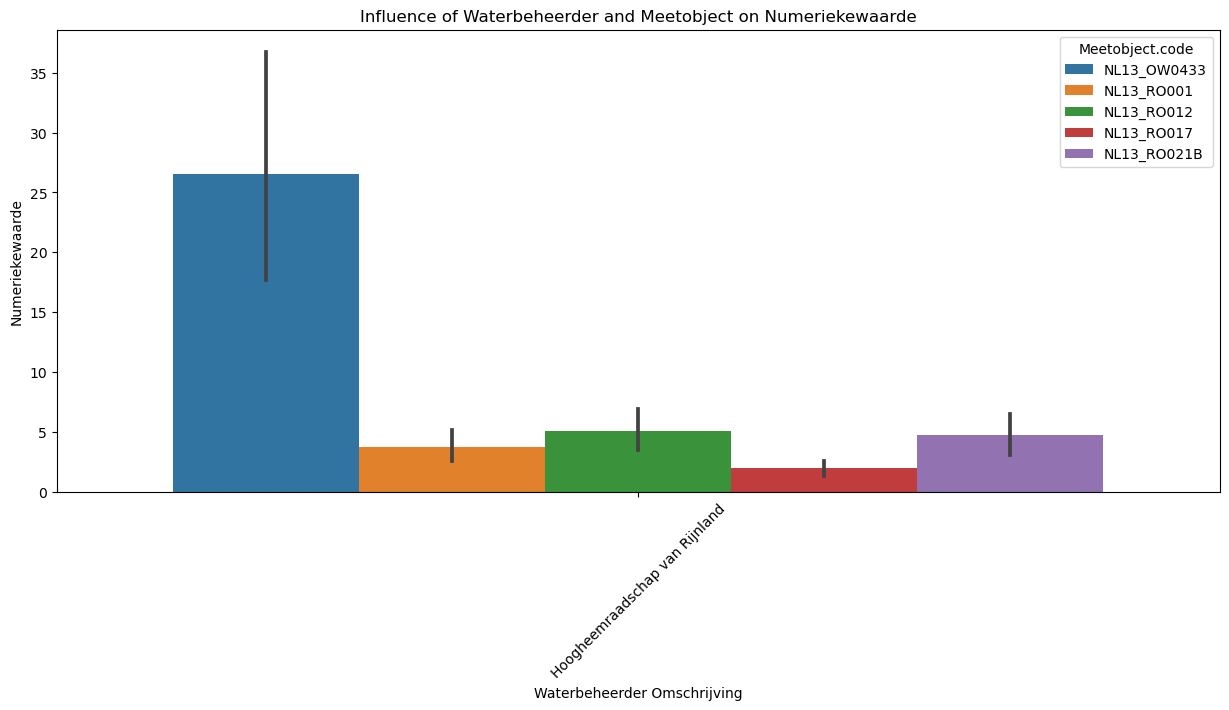

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Monsterophaaldatum' and 'Monsterophaaltijd' to datetime
data['Monsterophaaldatum'] = pd.to_datetime(data['Monsterophaaldatum'])
data['Monsterophaaltijd'] = pd.to_datetime(data['Monsterophaaltijd'], format='%H:%M:%S').dt.time

# Creating a combined datetime column for easier plotting
data['MonsterophaalDateTime'] = pd.to_datetime(data['Monsterophaaldatum'].astype(str) + ' ' + data['Monsterophaaltijd'].astype(str))

# Plot 1: Distribution of 'Numeriekewaarde' for different 'Parameter.omschrijving'
plt.figure(figsize=(15, 6))
sns.boxplot(x='Parameter.omschrijving', y='Numeriekewaarde', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Numeriekewaarde for different Parameters')
plt.xlabel('Parameter Omschrijving')
plt.ylabel('Numeriekewaarde')
plt.show()

# Plot 2: Relationship between 'MonsterophaalDateTime' and 'Numeriekewaarde' for different parameters
# Selecting a few parameters for demonstration
sample_parameters = data['Parameter.omschrijving'].unique()[:5]
sample_data = data[data['Parameter.omschrijving'].isin(sample_parameters)]

plt.figure(figsize=(15, 6))
sns.lineplot(x='MonsterophaalDateTime', y='Numeriekewaarde', hue='Parameter.omschrijving', data=sample_data)
plt.xticks(rotation=45)
plt.title('Numeriekewaarde over Time for Selected Parameters')
plt.xlabel('MonsterophaalDateTime')
plt.ylabel('Numeriekewaarde')
plt.show()

# Plot 3: Influence of 'Waterbeheerder.omschrijving' and 'Meetobject.code' on 'Numeriekewaarde'
# Due to potentially large number of categories, we'll visualize using a sample
sample_waterbeheerders = data['Waterbeheerder.omschrijving'].unique()[:5]
sample_meetobjecten = data['Meetobject.code'].unique()[:5]
sample_data_2 = data[(data['Waterbeheerder.omschrijving'].isin(sample_waterbeheerders)) & 
                     (data['Meetobject.code'].isin(sample_meetobjecten))]

plt.figure(figsize=(15, 6))
sns.barplot(x='Waterbeheerder.omschrijving', y='Numeriekewaarde', hue='Meetobject.code', data=sample_data_2)
plt.xticks(rotation=45)
plt.title('Influence of Waterbeheerder and Meetobject on Numeriekewaarde')
plt.xlabel('Waterbeheerder Omschrijving')
plt.ylabel('Numeriekewaarde')
plt.show()


In [ ]:
# Identify the largest waterbeheerder based on the number of records
largest_waterbeheerder = data['Waterbeheerder.omschrijving'].value_counts().idxmax()

# Filter the data for the largest waterbeheerder and the top 5 parameters
data_largest_waterbeheerder = data_top_5_params[data_top_5_params['Waterbeheerder.omschrijving'] == largest_waterbeheerder]

# Filename for the PDF report
pdf_filename = f"Waterbeheerder_{largest_waterbeheerder}_Report.pdf".replace(" ", "_")
pdf_path = f"/mnt/data/{pdf_filename}"

# Create a PDF report for the largest waterbeheerder
with matplotlib.backends.backend_pdf.PdfPages(pdf_path) as pdf:
    for parameter in top_5_parameters:
        param_data = data_largest_waterbeheerder[data_largest_waterbeheerder['Parameter.omschrijving'] == parameter]
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='MonsterophaalDateTime', y='Numeriekewaarde', data=param_data)
        plt.title(f'{largest_water


# Take aways
1. Eigen data, dus transparant wat de bron is.
2. Analyse word mee gegeven, ook transparant.
3. Eerste analyse kan een hoop tijd mee worden bespaard met de hulp van chatgpt.